In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\GFG Datascience\BlackFriday.csv')

In [3]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
#Analyse Columns
df['User_ID'].nunique()

5891

In [6]:
df['Product_ID'].nunique()

3623

In [7]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [10]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [14]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [15]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


<Axes: ylabel='Ratio'>

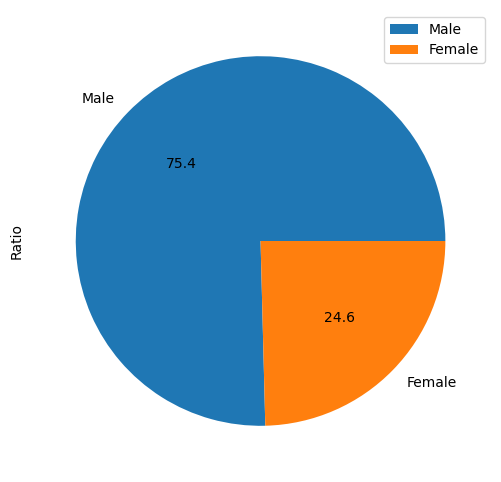

In [16]:
#Analyse Gender
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

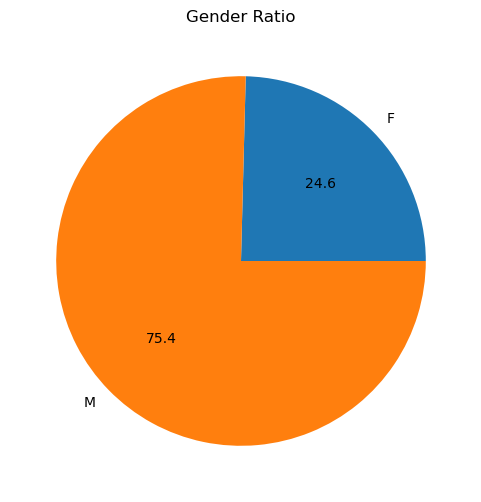

In [17]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

<Axes: xlabel='Gender'>

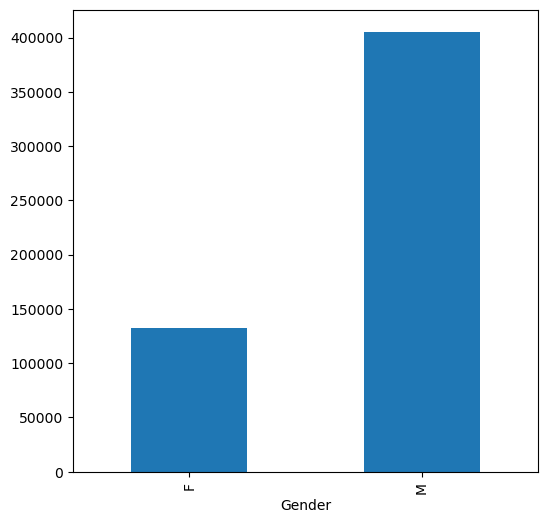

In [18]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

In [19]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

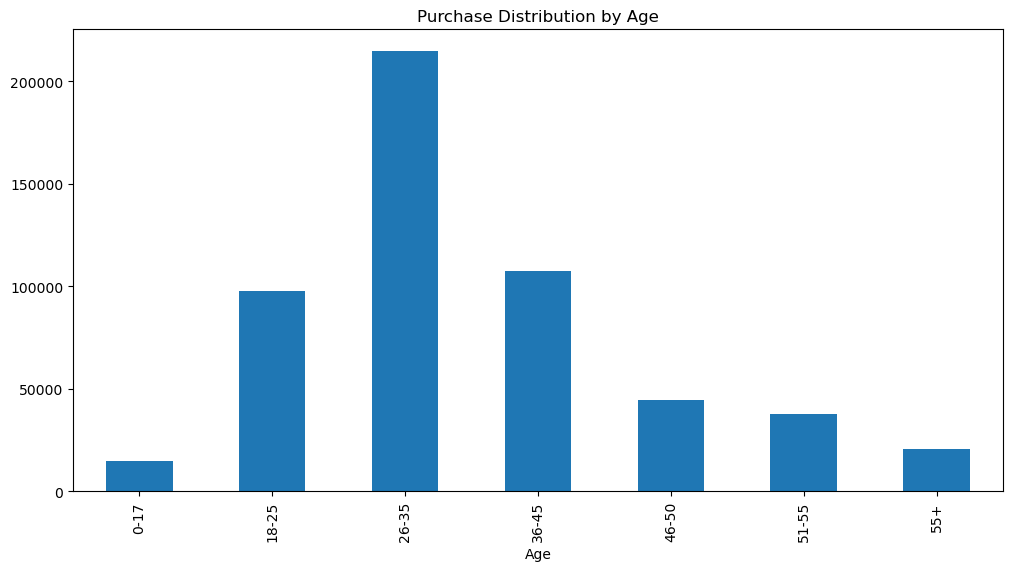

In [20]:
#Analyse age
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

In [21]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

<Axes: xlabel='Age'>

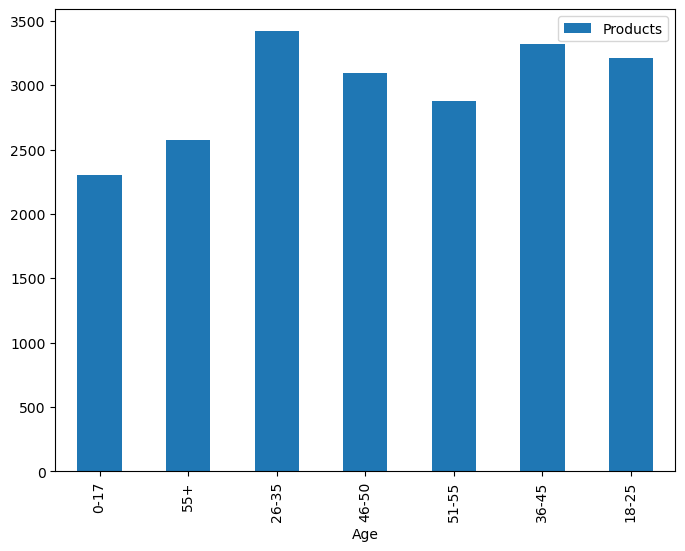

In [22]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

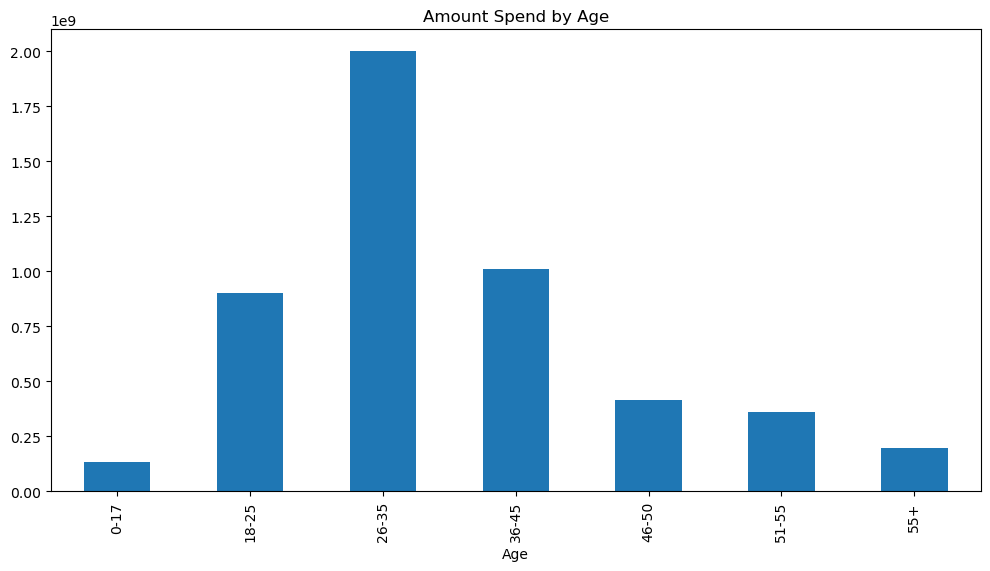

In [23]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

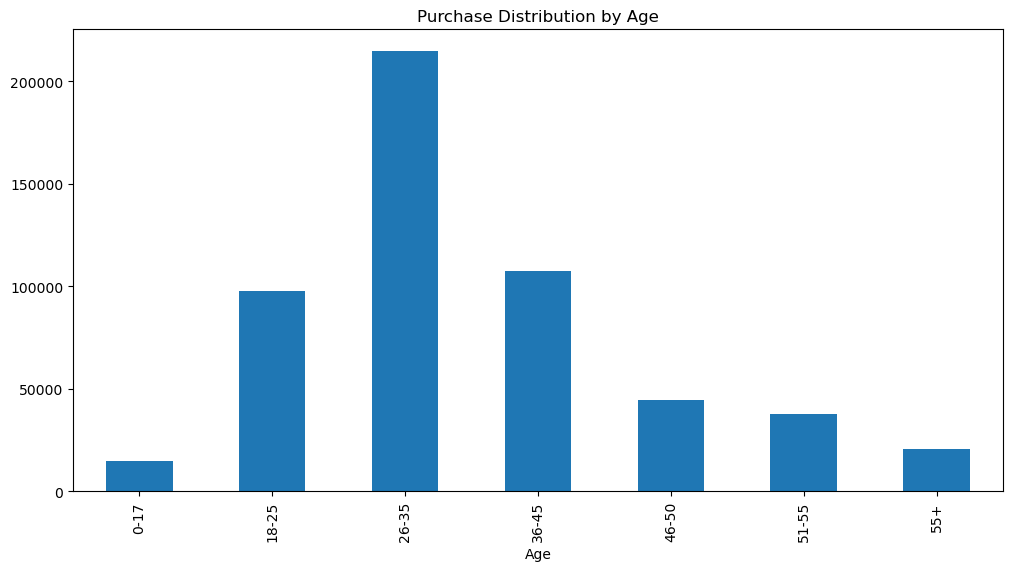

In [26]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<Axes: xlabel='Age', ylabel='count'>

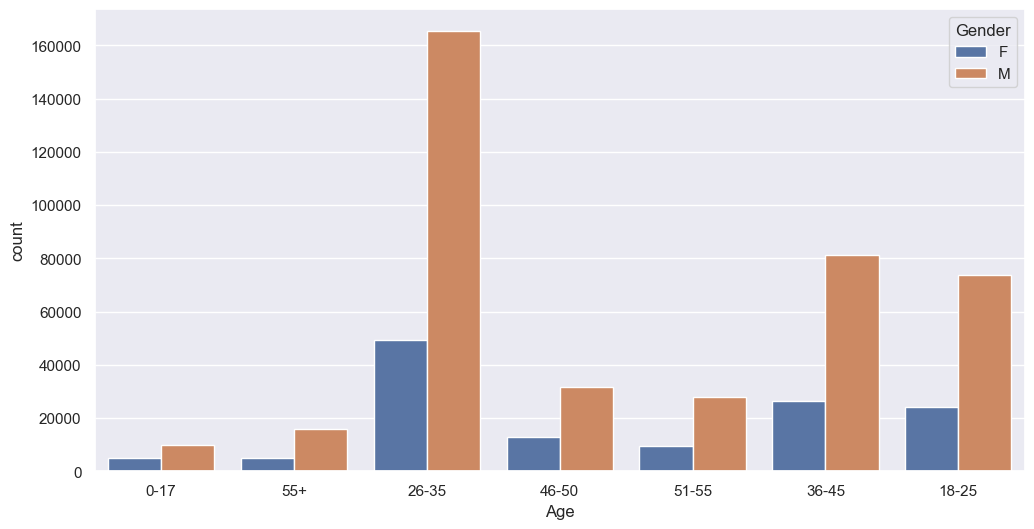

In [28]:
#Analyse MultiColumn
import seaborn as sns
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

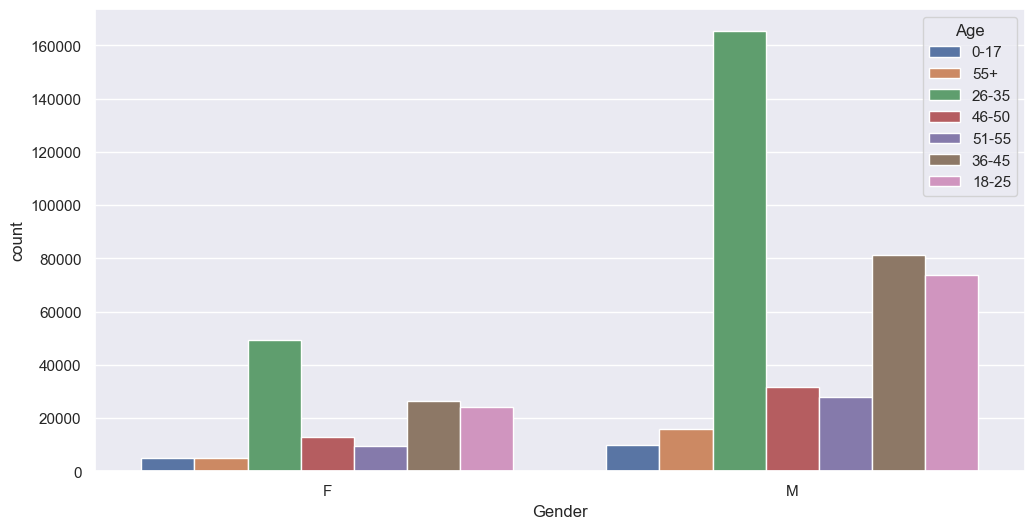

In [29]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

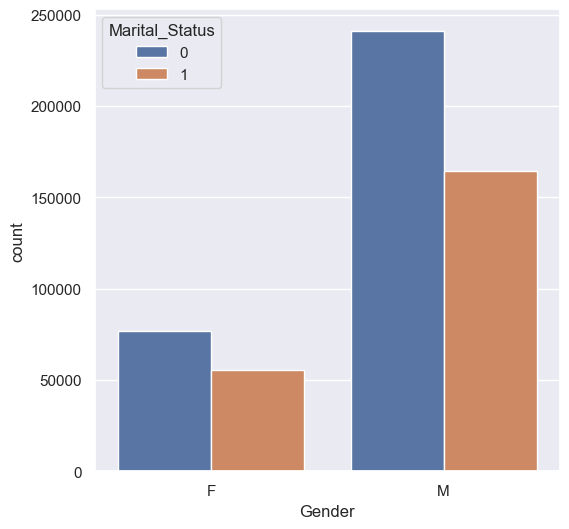

In [30]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

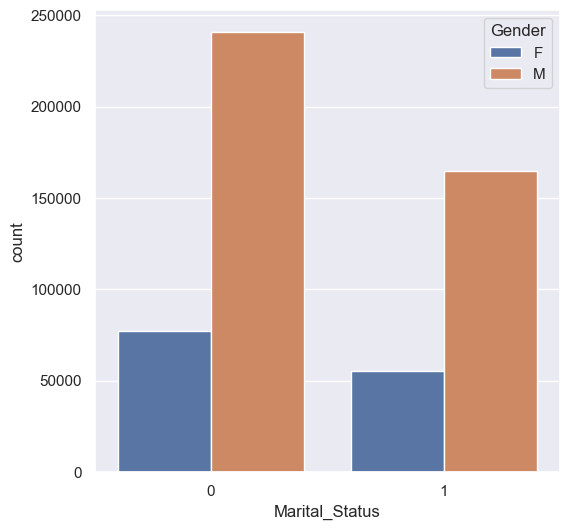

In [31]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Marital_Status", hue = 'Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

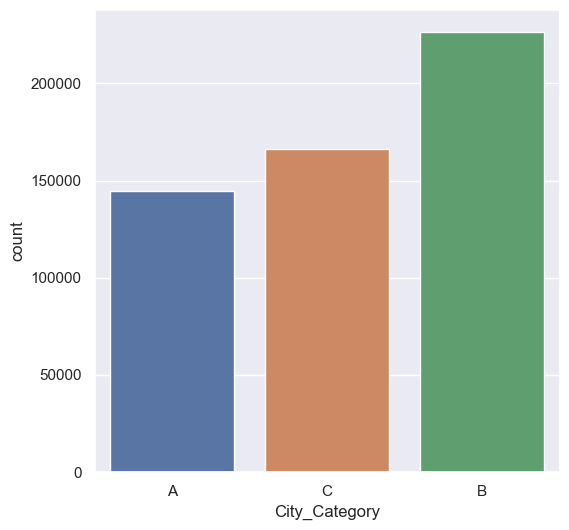

In [32]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

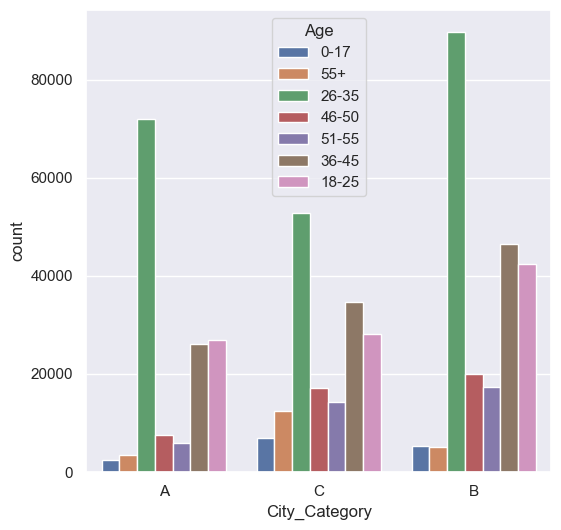

In [33]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

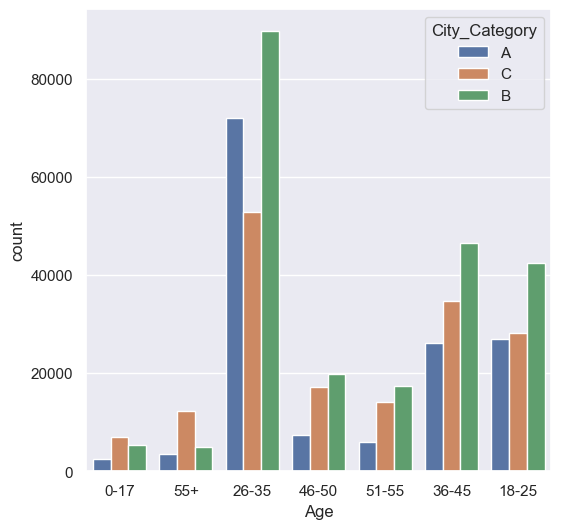

In [34]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

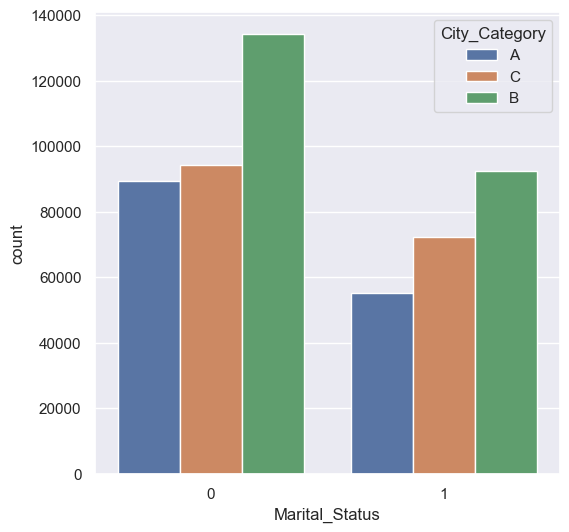

In [35]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: >

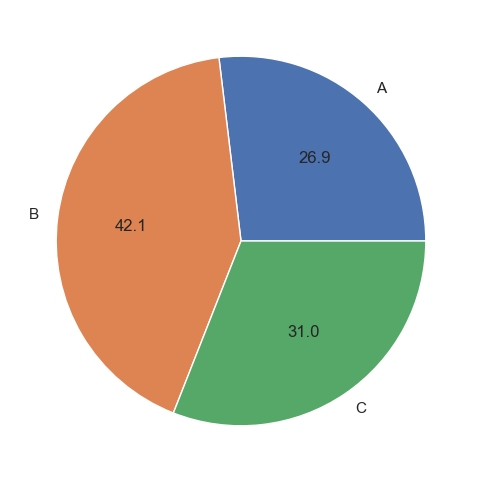

In [36]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

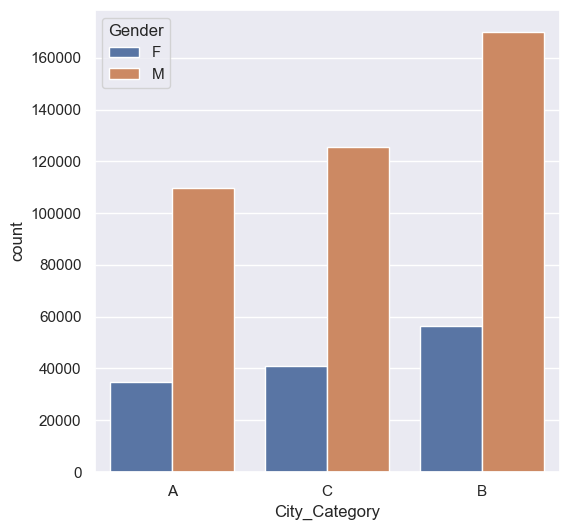

In [37]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

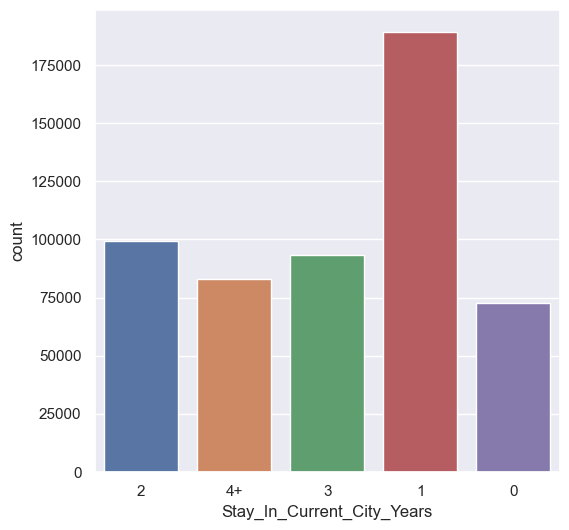

In [39]:
#occupation and product analysis
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

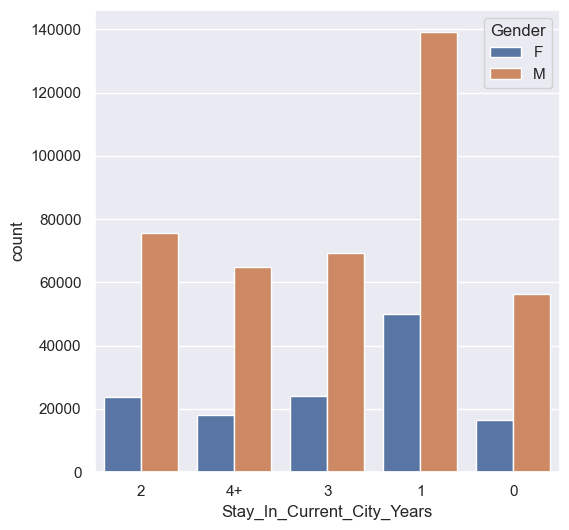

In [40]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

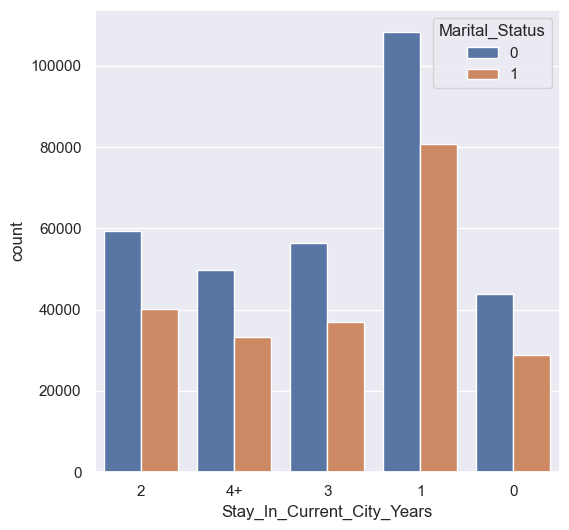

In [42]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

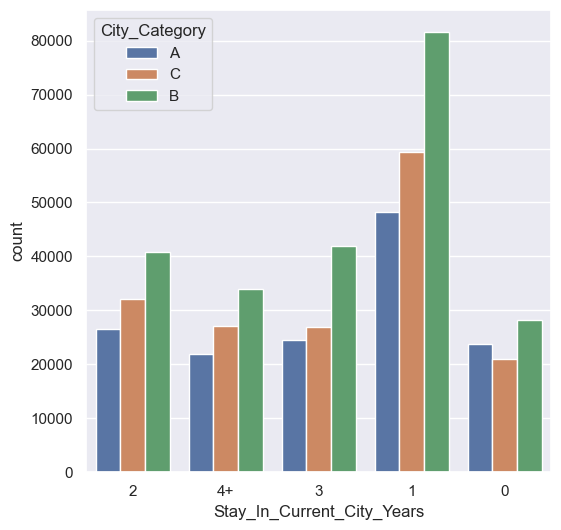

In [43]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

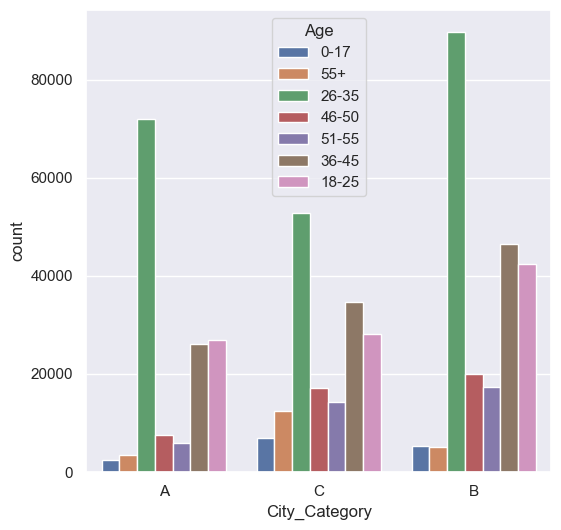

In [44]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

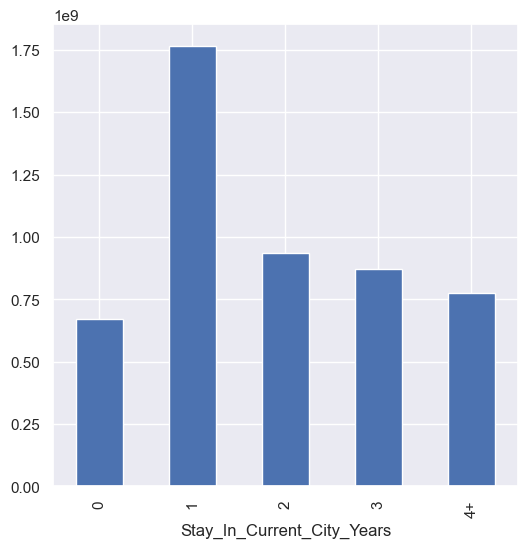

In [45]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

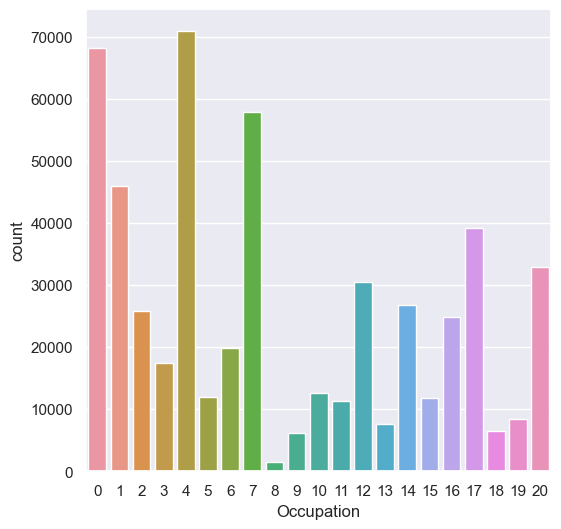

In [46]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

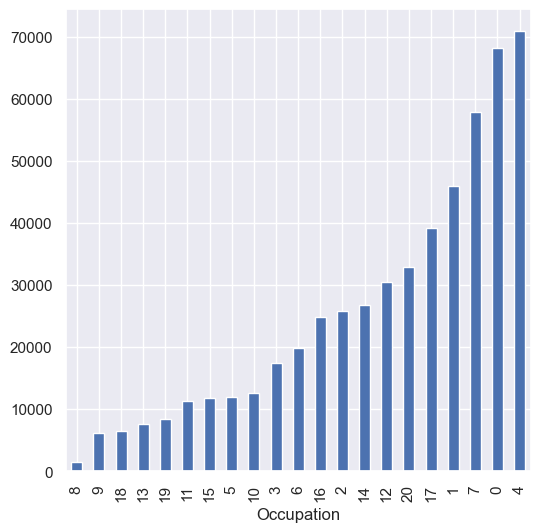

In [47]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

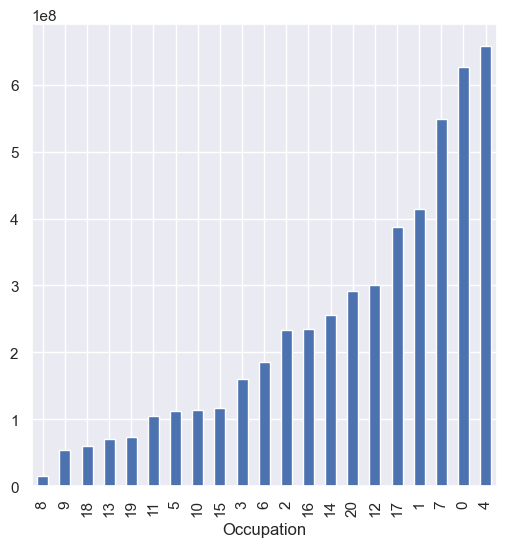

In [48]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

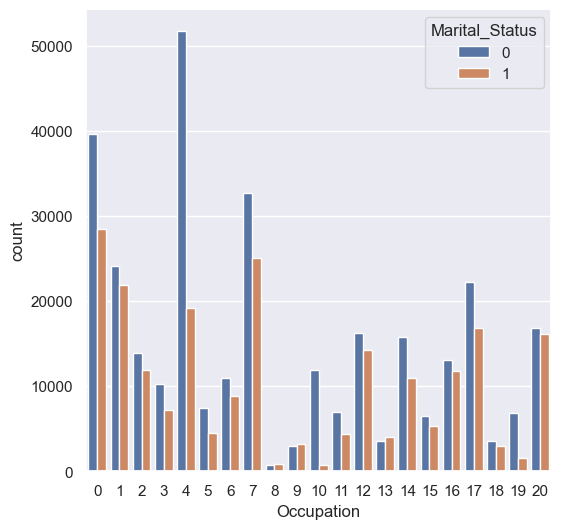

In [50]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

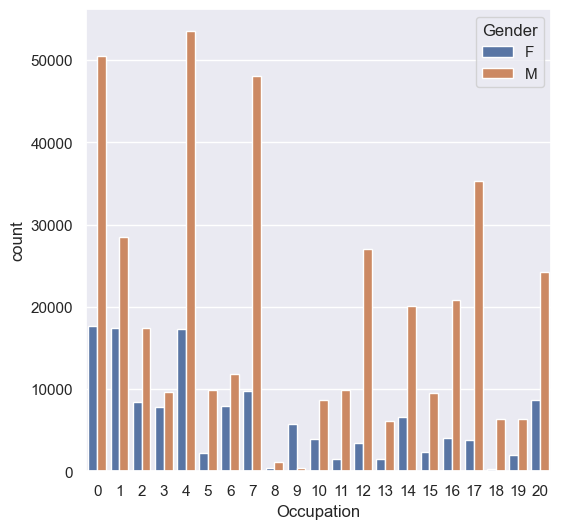

In [51]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

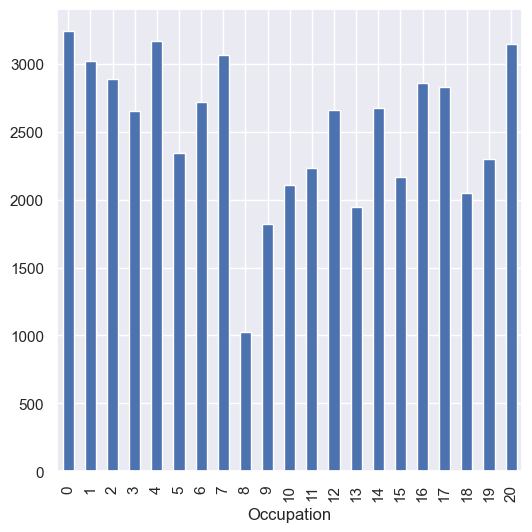

In [52]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

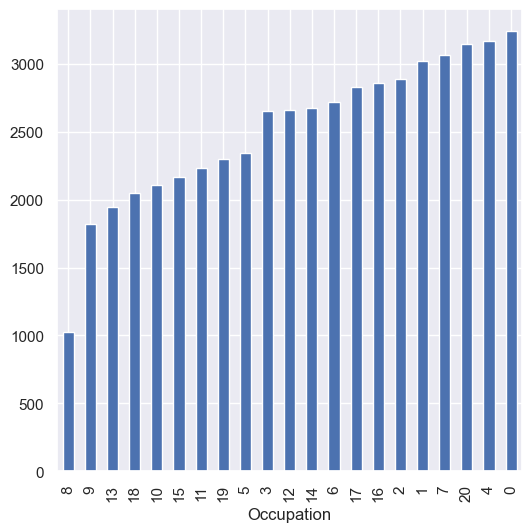

In [53]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

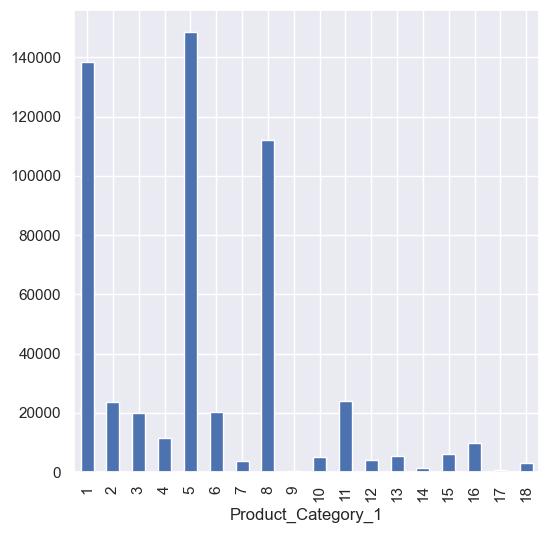

In [54]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

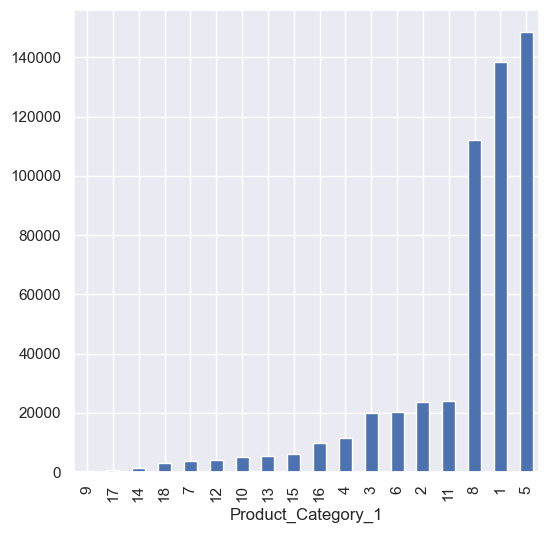

In [55]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

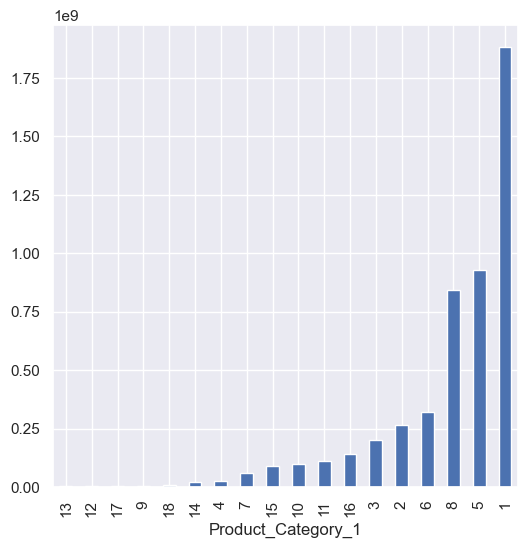

In [56]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

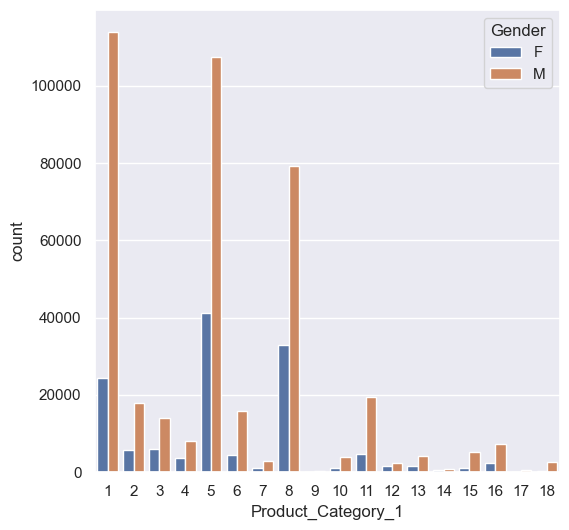

In [59]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

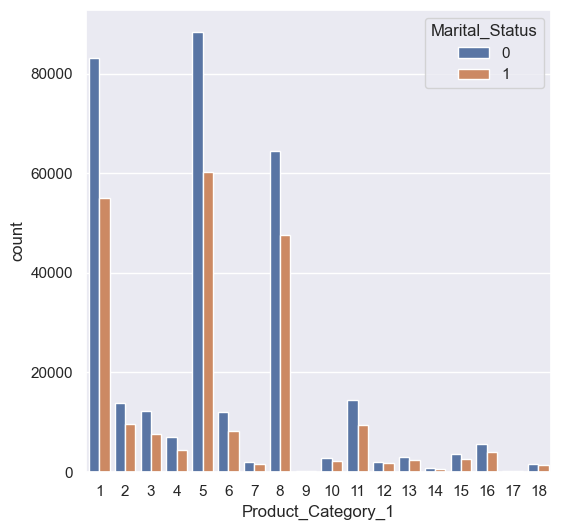

In [60]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

In [65]:
#Combine Age and Martial Status
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='MaritalGender', ylabel='count'>

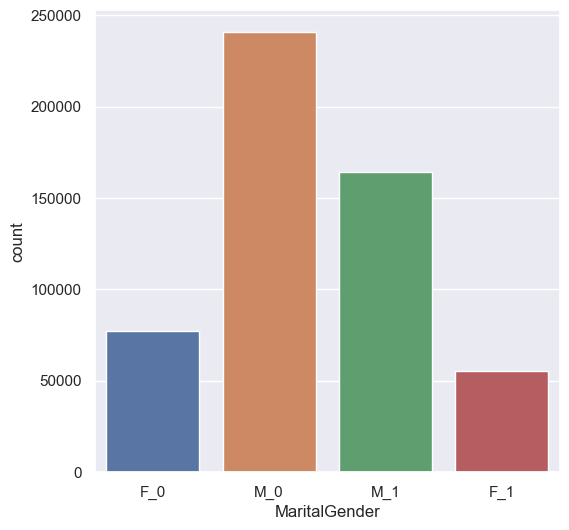

In [66]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

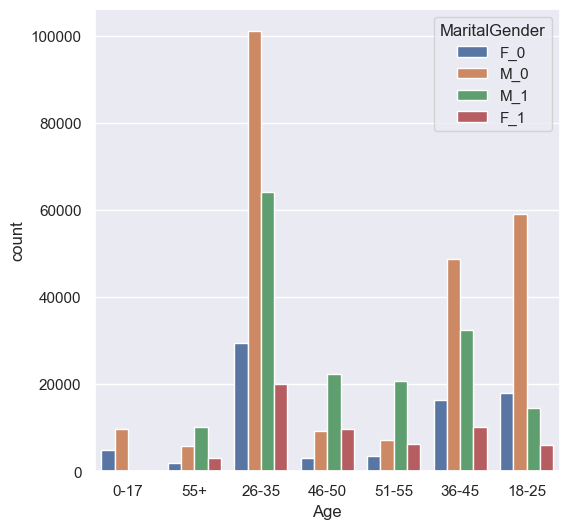

In [67]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

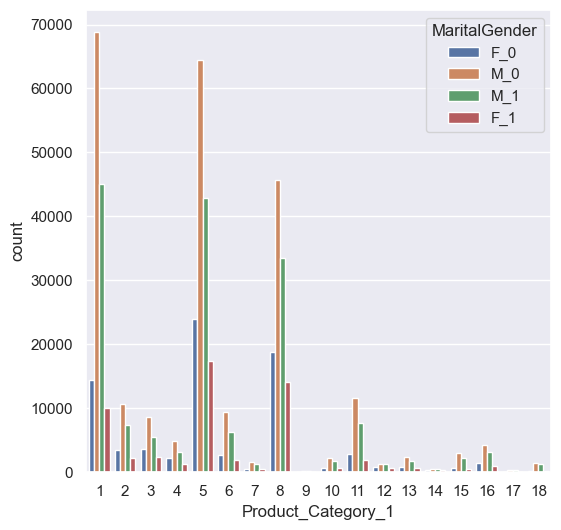

In [68]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

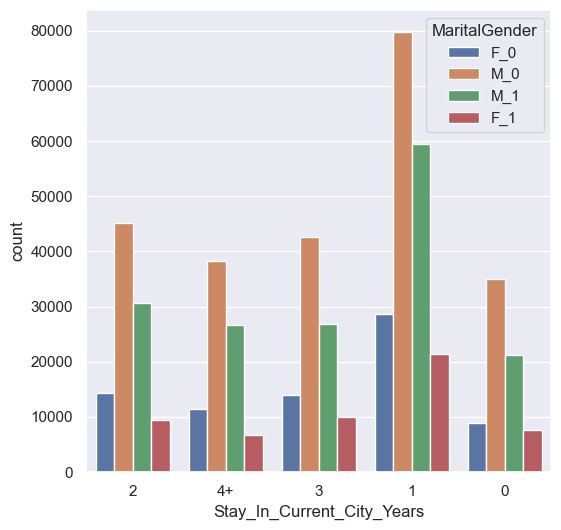

In [69]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

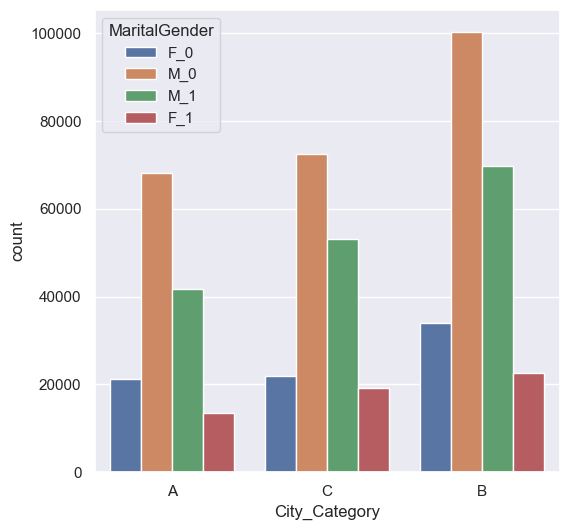

In [70]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])